In [3]:
import pandas as pd

In [4]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train = train.drop('Loan_ID', axis=1)
train.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [5]:
train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


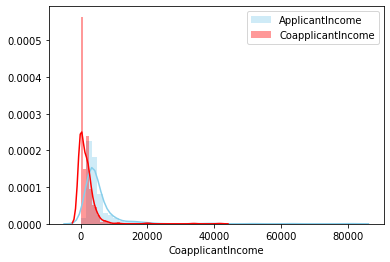

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot(train["ApplicantIncome"], color="skyblue", label="ApplicantIncome")
sns.distplot(train["CoapplicantIncome"], color="red", label="CoapplicantIncome")
#sns.distplot(train["Loan_Amount_Term"], color="blue", label="Loan_Amount_Term")
#sns.distplot(train["LoanAmount"], color="pink", label="LoanAmount")
plt.legend()

<Figure size 432x288 with 0 Axes>

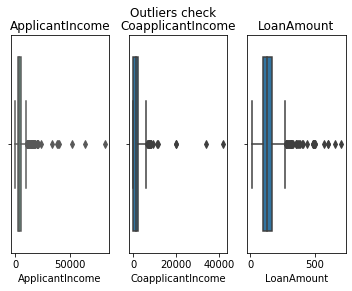

In [48]:
sns.despine(left=True)
fig, axes = plt.subplots(1,3)
plt.suptitle("Outliers check")
axes[0].set_title("ApplicantIncome")
axes[1].set_title("CoapplicantIncome")
axes[2].set_title("LoanAmount")
axes[0] = sns.boxplot(train['ApplicantIncome'], ax=axes[0],palette="Set2")
axes[1] = sns.boxplot(train['CoapplicantIncome'], ax=axes[1])
axes[2] = sns.boxplot(train['LoanAmount'], ax=axes[2])
plt.show()

In [27]:
train['ApplicantIncome'].describe()

count      614.000000
mean      5403.459283
std       6109.041673
min        150.000000
25%       2877.500000
50%       3812.500000
75%       5795.000000
max      81000.000000
Name: ApplicantIncome, dtype: float64

In [45]:
train['CoapplicantIncome'].describe()

count      614.000000
mean      1621.245798
std       2926.248369
min          0.000000
25%          0.000000
50%       1188.500000
75%       2297.250000
max      41667.000000
Name: CoapplicantIncome, dtype: float64

In [50]:
train['LoanAmount'].describe()

count    592.000000
mean     146.412162
std       85.587325
min        9.000000
25%      100.000000
50%      128.000000
75%      168.000000
max      700.000000
Name: LoanAmount, dtype: float64

<Figure size 432x288 with 0 Axes>

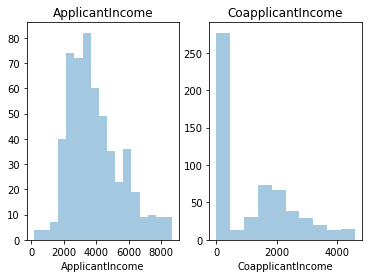

In [59]:
sns.despine(left=True)
fig, axes = plt.subplots(1,2)
#plt.suptitle("Outliers check")
axes[0].set_title("ApplicantIncome")
axes[1].set_title("CoapplicantIncome")

axes[0] = sns.distplot(train['ApplicantIncome'][train.ApplicantIncome<8712.5], ax=axes[0], kde=False)
axes[1] = sns.distplot(train['CoapplicantIncome'][train.CoapplicantIncome<4594.5], ax=axes[1], kde=False)

#axes[1] = sns.boxplot(train['CoapplicantIncome'], ax=axes[0])
plt.show()

<Figure size 432x288 with 0 Axes>

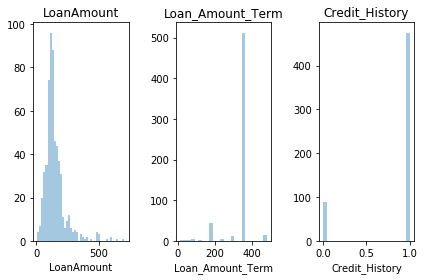

In [64]:
sns.despine(left=True)
fig, axes = plt.subplots(1,3)
axes[0].set_title("LoanAmount")
axes[1].set_title("Loan_Amount_Term")
axes[2].set_title("Credit_History")
axes[0] = sns.distplot(train['LoanAmount'], ax=axes[0], kde=False)
axes[1] = sns.distplot(train['Loan_Amount_Term'], ax=axes[1], kde=False)
axes[2] = sns.distplot(train['Credit_History'], ax=axes[2], kde=False)
plt.tight_layout()

<Figure size 432x288 with 0 Axes>

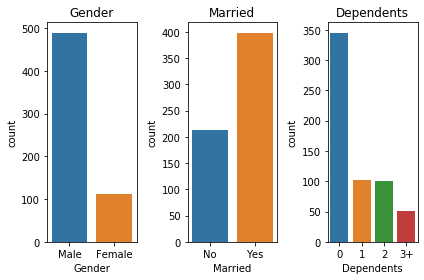

In [63]:
sns.despine(left=True)
fig, axes = plt.subplots(1,3)
axes[0].set_title("Gender")
axes[1].set_title("Married")
axes[2].set_title("Dependents")
axes[0] = sns.countplot(train['Gender'], ax=axes[0])
axes[1] = sns.countplot(train['Married'], ax=axes[1])
axes[2] = sns.countplot(train['Dependents'], ax=axes[2])
plt.tight_layout()

<Figure size 432x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

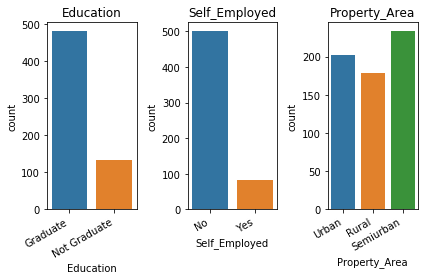

In [75]:
sns.despine(left=True)
plt.figure(figsize=(8,4))
fig, axes = plt.subplots(1,3)
axes[0].set_title("Education")
axes[1].set_title("Self_Employed")
axes[2].set_title("Property_Area")
axes[0] = sns.countplot(train['Education'], ax=axes[0])
axes[1] = sns.countplot(train['Self_Employed'], ax=axes[1])
axes[2] = sns.countplot(train['Property_Area'], ax=axes[2])
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=30, ha="right")
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=30, ha="right")
axes[2].set_xticklabels(axes[2].get_xticklabels(), rotation=30, ha="right")
plt.tight_layout()

In [80]:
train = train[(train.ApplicantIncome<8712.5) & (train.CoapplicantIncome<4594.5)]
train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [81]:
X = train.drop('Loan_Status', axis=1)
y = train['Loan_Status']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [82]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

In [83]:
numeric_features = train.select_dtypes(include=['int64', 'float64']).columns
categorical_features = train.select_dtypes(include=['object']).drop(['Loan_Status'], axis=1).columns

from sklearn.compose import ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

In [84]:
from sklearn.ensemble import RandomForestClassifier
rf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', RandomForestClassifier())])
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

c:\users\lxie\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [85]:
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="rbf", C=0.025, probability=True),
    NuSVC(probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier()
    ]

In [86]:
for classifier in classifiers:
    pipe = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', classifier)])
    pipe.fit(X_train, y_train)   
    print(classifier)
    print("model score: %.3f" % pipe.score(X_test, y_test))
    print()

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')
model score: 0.814
SVC(C=0.025, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=True, random_state=None,
    shrinking=True, tol=0.001, verbose=False)
model score: 0.686
NuSVC(cache_size=200, class_weight=None, coef0=0.0,
      decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
      kernel='rbf', max_iter=-1, nu=0.5, probability=True, random_state=None,
      shrinking=True, tol=0.001, verbose=False)
model score: 0.824
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_sa

c:\users\lxie\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\lxie\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\lxie\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
model score: 0.804
AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None)
model score: 0.833
GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_

In [113]:
X_train.shape

(408, 11)

In [87]:
param_grid = { 
    'classifier__n_estimators': [200, 500],
    'classifier__max_features': ['auto', 'sqrt', 'log2'],
    'classifier__max_depth' : [4,5,6,7,8],
    'classifier__criterion' :['gini', 'entropy']}
from sklearn.model_selection import GridSearchCV
CV = GridSearchCV(rf, param_grid, n_jobs= 1)
CV.fit(X_train, y_train)  
print(CV.best_params_)    
print(CV.best_score_)

c:\users\lxie\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


{'classifier__criterion': 'gini', 'classifier__max_depth': 4, 'classifier__max_features': 'auto', 'classifier__n_estimators': 200}
0.8235294117647058


In [114]:
print(CV.best_estimator_[1])

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=4, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


NameError: name 'plot_importance' is not defined

In [112]:
X_train.shape

(408, 11)

In [128]:
y_test

335    Y
460    Y
455    Y
220    N
609    Y
      ..
237    Y
454    Y
549    Y
64     N
59     Y
Name: Loan_Status, Length: 102, dtype: object

In [138]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
rf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', RandomForestClassifier())])
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
#mean_squared_error(y_test, y_pred)
accuracy_score(y_test, y_pred)

c:\users\lxie\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.803921568627451

In [139]:
rf[1].feature_importances_

array([0.19330268, 0.09840782, 0.15990736, 0.05114692, 0.20681868,
       0.02034467, 0.01132999, 0.00683824, 0.01972253, 0.0187927 ,
       0.02264384, 0.02005951, 0.00989633, 0.01643365, 0.00487017,
       0.02273934, 0.00948941, 0.0103846 , 0.01667463, 0.0124363 ,
       0.02033424, 0.02696483, 0.02046153])

In [140]:
X_train.shape

(408, 11)

In [144]:
rf.named_steps['preprocessor'].transformers_[1][1].named_steps['onehot'].get_feature_names(categorical_features)

array(['Gender_Female', 'Gender_Male', 'Gender_missing', 'Married_No',
       'Married_Yes', 'Dependents_0', 'Dependents_1', 'Dependents_2',
       'Dependents_3+', 'Dependents_missing', 'Education_Graduate',
       'Education_Not Graduate', 'Self_Employed_No', 'Self_Employed_Yes',
       'Self_Employed_missing', 'Property_Area_Rural',
       'Property_Area_Semiurban', 'Property_Area_Urban'], dtype=object)

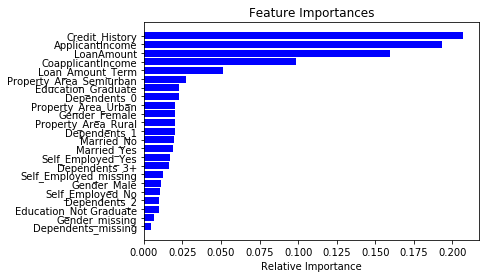

In [193]:
import numpy as np
#num_features = np.array(["ApplicantIncome", "CoapplicantIncome", "LoanAmount", "Loan_Amount_Term", "Credit_History"])
cat_features = rf.named_steps['preprocessor'].transformers_[1][1].named_steps['onehot'].get_feature_names(categorical_features)
features = np.concatenate((numeric_features, cat_features), axis=0)
importances = rf[1].feature_importances_
indices = np.argsort(importances)
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [194]:
num_features.tolist()

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')

In [172]:
rf.named_steps['preprocessor'].transformers_[1][1].named_steps['onehot'].get_feature_names(numerical_features)

NameError: name 'numerical_features' is not defined

In [145]:
from sklearn.metrics import plot_confusion_matrix

ImportError: cannot import name 'plot_confusion_matrix' from 'sklearn.metrics' (c:\users\lxie\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\metrics\__init__.py)

In [146]:
sklearn.__version__

NameError: name 'sklearn' is not defined

In [149]:
import sklearn

In [150]:
sklearn.__version__

'0.21.3'

In [152]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_test, y_pred)
matrix

array([[18, 14],
       [ 6, 64]], dtype=int64)

In [157]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 1, 'Confusion Matrix')

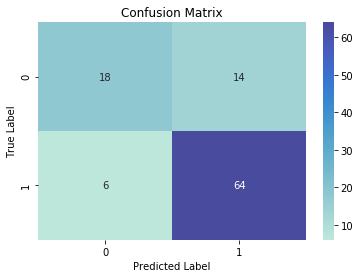

In [171]:

ax = sns.heatmap(matrix,annot=True,cbar=True,center=100.0)
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

plt.title("Confusion Matrix")
